# MNIST Digit Classification

In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns

Loading the mnist digits from scikit-learn

In [2]:
from sklearn.datasets import load_digits
digit = load_digits()

Checking the loaded data to find the details

In [5]:
print(digit.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

The size of image is 8x8 which is a vital information. This is not a complete dataset from MNIST.

In [6]:
df1 = pd.DataFrame(digit.data)
df2 = pd.DataFrame(digit.target, columns = ['target'])

## Knowing the data

Exploring the data to get the basic idea. To also find if there are any false or null values to work on

In [7]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
0     1797 non-null float64
1     1797 non-null float64
2     1797 non-null float64
3     1797 non-null float64
4     1797 non-null float64
5     1797 non-null float64
6     1797 non-null float64
7     1797 non-null float64
8     1797 non-null float64
9     1797 non-null float64
10    1797 non-null float64
11    1797 non-null float64
12    1797 non-null float64
13    1797 non-null float64
14    1797 non-null float64
15    1797 non-null float64
16    1797 non-null float64
17    1797 non-null float64
18    1797 non-null float64
19    1797 non-null float64
20    1797 non-null float64
21    1797 non-null float64
22    1797 non-null float64
23    1797 non-null float64
24    1797 non-null float64
25    1797 non-null float64
26    1797 non-null float64
27    1797 non-null float64
28    1797 non-null float64
29    1797 non-null float64
30    1797 non-null float64
31    1797 non-null float

In [8]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [12]:
df2['target'].value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

The size of each class is not even but all are very close. There is no need of any processing.

## Plotting the data

The numeric data in our dataset are values of pixles in the image. There is no relation in between the data. Therefore plotting the images gives a better picture.

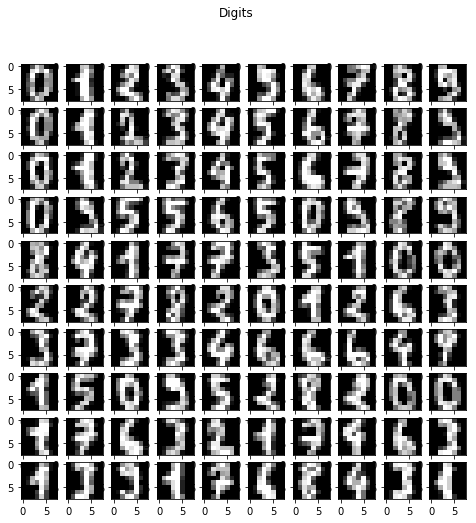

In [14]:
fig, ax = plt.subplots(10, 10, figsize=(8, 8))
plt.suptitle("Digits")
num = 0
for i in range(10):
    for j in range(10):        
        pix = df1.iloc[num]
        pix = np.array(pix, dtype='float')
        pix = pix.reshape((8,8)) 
        ax[i, j].imshow(pix, cmap='gray')  
        num += 1

These are just random 100 images from the dataset.

## Splitting the data into training, cross validation and testing dataset

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, df2, train_size = 0.6,test_size = 0.4, random_state = 1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size = 0.5, test_size = 0.5, random_state = 1)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
print (X_val.shape, y_val.shape)

(1078, 64) (1078, 1)
(359, 64) (359, 1)
(360, 64) (360, 1)


## Training and Testing (Different Models)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train.values.ravel())

knn_score = knn.score(X_val, y_val)

In [10]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())

gnb_score = gnb.score(X_val, y_val)

In [11]:
from sklearn import svm
svc = svm.SVC(gamma ='scale')
svc.fit(X_train, y_train.values.ravel())

svc_score = svc.score(X_val, y_val)

In [12]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train.values.ravel())

dtc_score = dtc.score(X_val, y_val)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
rfc.fit(X_train, y_train.values.ravel())

rfc_score = rfc.score(X_val, y_val)

In [14]:
models = pd.DataFrame({'Model': ['KNN','Naive Bayes','SVC','Decision Tree','Random Forest'],
    'Score': [knn_score, gnb_score, svc_score, dtc_score, rfc_score]})
print(models.sort_values(by ='Score', ascending = False))

           Model     Score
2            SVC  0.980556
0            KNN  0.977778
4  Random Forest  0.847222
3  Decision Tree  0.833333
1    Naive Bayes  0.805556


Now SVC and KNN will be studied in the detail

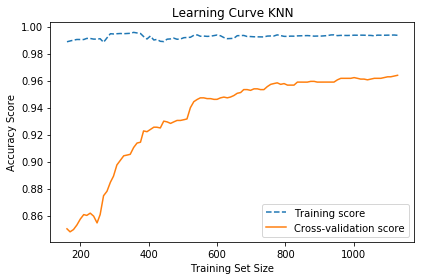

In [15]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=3), 
                                                        df1,df2,cv=10,scoring='accuracy',n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 0.7, 100))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--',  label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")

plt.title("Learning Curve KNN")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

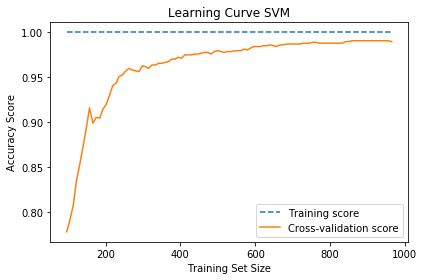

In [16]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(svm.SVC(gamma ='scale'), 
                                                        X_train,y_train,cv=10,scoring='accuracy',n_jobs=-1,
                                                        train_sizes=np.linspace(0.1,1, 100))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--',  label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")

plt.title("Learning Curve SVM")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Final result

In [18]:
from sklearn import svm
svc = svm.SVC(gamma ='scale')
svc.fit(X_train, y_train.values.ravel())

svc_score = svc.score(X_test, y_test)
print(svc_score*100)

98.32869080779945


This is score with training on 60% of data.